In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('avocado.csv')
df = df.copy()[df['type']=='organic']

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df_albany = df.copy([df['region']=='Albany'])

In [5]:
df_albany.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.0,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.0,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.0,0.0,organic,2015,Albany


In [6]:
df_albany.set_index('Date' , inplace=True)

In [7]:
df_albany.head(4)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
2015-12-20,1,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
2015-12-13,2,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
2015-12-06,3,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany


In [8]:
df_albany.sort_index(inplace = True)

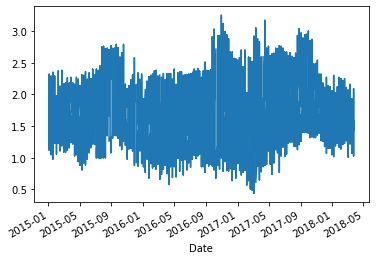

In [9]:
df_albany['AveragePrice'].plot()

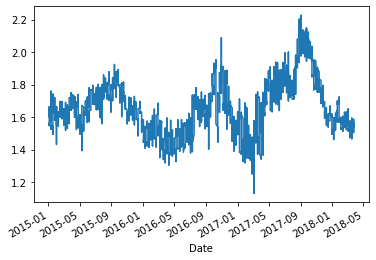

In [10]:
df_albany['AveragePrice'].rolling(25).mean().plot()

In [11]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [12]:
graph_df = pd.DataFrame()

In [13]:
for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date' , inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty :
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


In [14]:
graph_df.head(3)

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,...,SouthCarolina_price25ma,SouthCentral_price25ma,Southeast_price25ma,Spokane_price25ma,StLouis_price25ma,Syracuse_price25ma,Tampa_price25ma,TotalUS_price25ma,West_price25ma,WestTexNewMexico_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
